# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download from Atlas and Load Data

In [3]:
from dpet.ensemble import Ensemble


ensembles = [
    Ensemble("PED00156e001", database='ped'),
    Ensemble("PED00157e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.top.pdb'),
    Ensemble("PED00158e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/testington'

analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories()

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
PED00156e001 chain ids: ['A']
Generating trajectory for PED00156e001...
Generated trajectory saved to C:\Users\nikol\Documents\test_dir\testington.
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x2582953c220>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x25829f7a9e0>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x2583190c160>}

In [4]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00156e001 trajectory.
50 conformations sampled from PED00157e001 trajectory.
50 conformations sampled from PED00158e001 trajectory.


{'PED00156e001': <mdtraj.Trajectory with 50 frames, 941 atoms, 59 residues, without unitcells at 0x25829fa6da0>,
 'PED00157e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x2582a03a200>,
 'PED00158e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x2583190c430>}

## Featurization

In [5]:
analysis.extract_features(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (50, 116)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (50, 116)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (50, 116)
Feature names: ['GLU2-PHI', 'ALA3-PHI', 'ILE4-PHI', 'ALA5-PHI', 'LYS6-PHI', 'HIS7-PHI', 'ASP8-PHI', 'PHE9-PHI', 'SER10-PHI', 'ALA11-PHI', 'THR12-PHI', 'ALA13-PHI', 'ASP14-PHI', 'ASP15-PHI', 'GLU16-PHI', 'LEU17-PHI', 'SER18-PHI', 'PHE19-PHI', 'ARG20-PHI', 'LYS21-PHI', 'THR22-PHI', 'GLN23-PHI', 'ILE24-PHI', 'LEU25-PHI', 'LYS26-PHI', 'ILE27-PHI', 'LEU28-PHI', 'ASN29-PHI', 'MET30-PHI', 'GLU31-PHI', 'ASP32-PHI', 'ASP33-PHI', 'SER34-PHI', 'ASN35-PHI', 'TRP36-PHI', 'TYR37-PHI', 'ARG38-PHI', 'ALA39-PHI', 'GLU40-PHI', 'LEU41-PHI', 'ASP42-PHI', 'GLY43-PHI', 'LYS44-PHI', 'GLU45-PHI', 'GLY46-PHI', 'LEU47-PHI', 'ILE48-PHI', 'PRO49-PHI', 'SER50-PHI', 'ASN51-PHI', 'TYR52-PHI', 'ILE53-PHI', 'GLU54-PHI', 'MET55-PHI', 'L

{'PED00156e001': array([[-1.6005999e+00, -1.9177018e+00, -1.4037023e+00, ...,
          1.5446836e+00,  2.4645476e+00, -6.1279631e-01],
        [-1.5158175e+00, -1.7745665e+00, -2.6367090e+00, ...,
          2.0676594e+00, -1.3895240e+00,  1.1281661e+00],
        [ 1.0078790e+00, -1.7983353e+00, -2.2126992e+00, ...,
          9.6803880e-01,  1.7023655e+00,  1.6167085e-01],
        ...,
        [-1.5948298e+00, -1.3086290e+00, -1.2569621e+00, ...,
          2.9694479e+00, -1.4147823e+00,  1.5887625e-03],
        [ 1.3085275e+00, -1.1451393e+00, -1.1881703e+00, ...,
          1.7308028e-01, -6.5414691e-01,  1.3443725e+00],
        [ 1.2424880e+00, -1.5681138e+00, -1.7288411e+00, ...,
          2.5421731e+00, -3.0548692e+00,  2.6415639e+00]], dtype=float32),
 'PED00157e001': array([[-0.7468714 , -1.264298  , -2.2226098 , ..., -0.74711585,
         -1.0294784 , -0.98141646],
        [-1.5628695 , -1.1853529 , -1.1232009 , ..., -0.43285525,
         -2.6464052 , -1.0290296 ],
        [-1.21

## Dimensionality Reduction

In [6]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (150, 116)
tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 50
Best Number of Clusters: 2


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

array([[-1.6008251e+00,  4.0855556e+00],
       [-3.1271548e+00,  1.4298495e+00],
       [-3.2994893e-01,  2.9864755e+00],
       [ 3.5514730e-01,  3.4254639e+00],
       [-1.3453066e+00,  3.9614360e+00],
       [-2.1620326e+00,  3.3847482e+00],
       [-1.3987186e+00,  3.9228022e+00],
       [-1.8655807e+00,  4.2298756e+00],
       [-2.3965986e+00,  4.0803084e+00],
       [-6.3149357e-01,  3.2523625e+00],
       [ 3.7052408e-01,  4.4071498e+00],
       [-2.2752748e+00,  1.3225162e+00],
       [-1.2977096e+00,  2.3747025e+00],
       [-2.6721659e+00,  1.8799496e+00],
       [-1.0752652e+00,  2.8041077e+00],
       [ 1.1989009e+00, -9.7789216e-01],
       [ 7.5370729e-01,  3.1131504e+00],
       [-5.6570429e-01,  3.1850355e+00],
       [-3.0402863e+00,  2.5148742e+00],
       [ 4.0078214e-01, -1.5451124e+00],
       [-2.6819675e+00,  2.2238841e+00],
       [-1.8022778e+00,  2.3366768e+00],
       [-2.0147228e+00,  2.3937769e+00],
       [-2.2277358e+00,  1.5439322e+00],
       [ 2.27637

## Analysis

C:\Users/nikol/Documents/GitHub/EnsembleTools\dpet\visualization.py:238: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\nikol\AppData\Local\Temp\ipykernel_24172\518842094.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


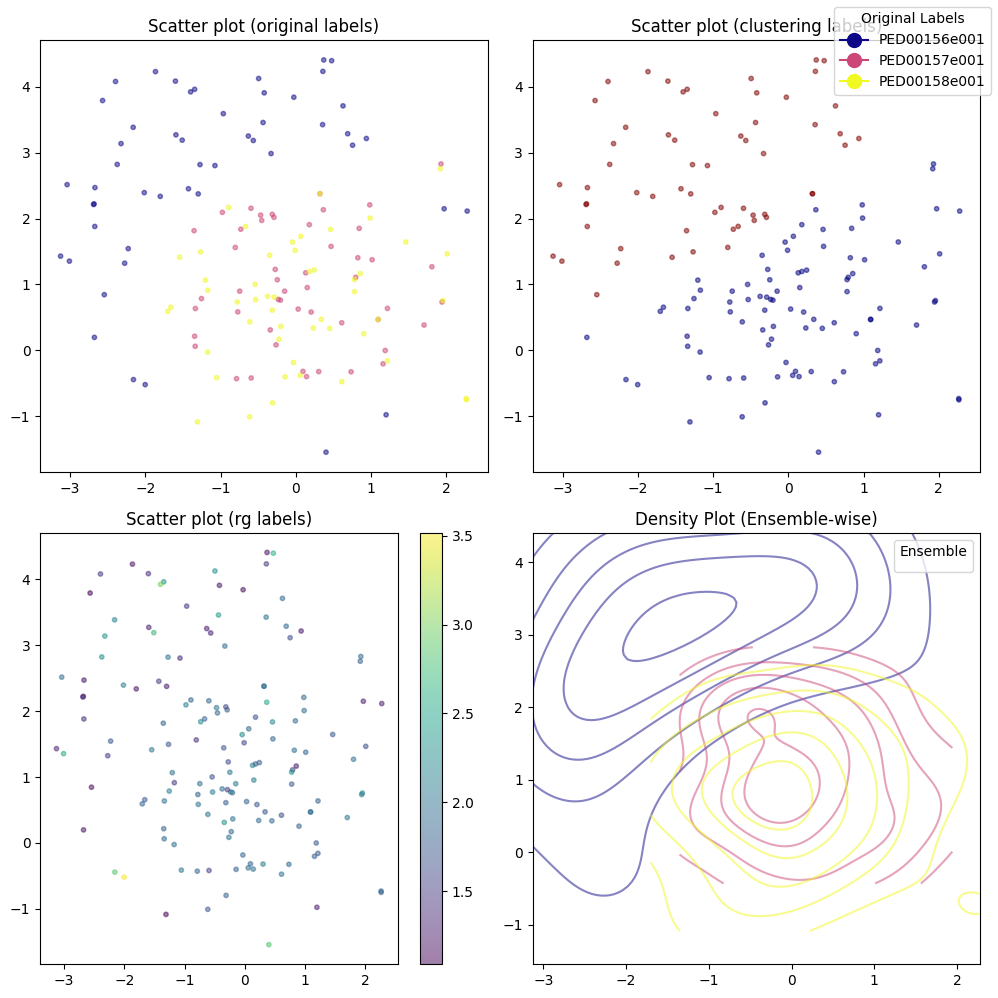

In [7]:
from matplotlib import pyplot as plt
from dpet.visualization import Visualization


vis = Visualization(analysis)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

vis.dimensionality_reduction_scatter(ax=ax, kde_by_ensemble=True)

fig.show()

In [8]:
analysis.get_features('phi_psi')

{'PED00156e001': array([[-1.6005999e+00, -1.9177018e+00, -1.4037023e+00, ...,
          1.5446836e+00,  2.4645476e+00, -6.1279631e-01],
        [-1.5158175e+00, -1.7745665e+00, -2.6367090e+00, ...,
          2.0676594e+00, -1.3895240e+00,  1.1281661e+00],
        [ 1.0078790e+00, -1.7983353e+00, -2.2126992e+00, ...,
          9.6803880e-01,  1.7023655e+00,  1.6167085e-01],
        ...,
        [-1.5948298e+00, -1.3086290e+00, -1.2569621e+00, ...,
          2.9694479e+00, -1.4147823e+00,  1.5887625e-03],
        [ 1.3085275e+00, -1.1451393e+00, -1.1881703e+00, ...,
          1.7308028e-01, -6.5414691e-01,  1.3443725e+00],
        [ 1.2424880e+00, -1.5681138e+00, -1.7288411e+00, ...,
          2.5421731e+00, -3.0548692e+00,  2.6415639e+00]], dtype=float32),
 'PED00157e001': array([[-0.7468714 , -1.264298  , -2.2226098 , ..., -0.74711585,
         -1.0294784 , -0.98141646],
        [-1.5628695 , -1.1853529 , -1.1232009 , ..., -0.43285525,
         -2.6464052 , -1.0290296 ],
        [-1.21

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


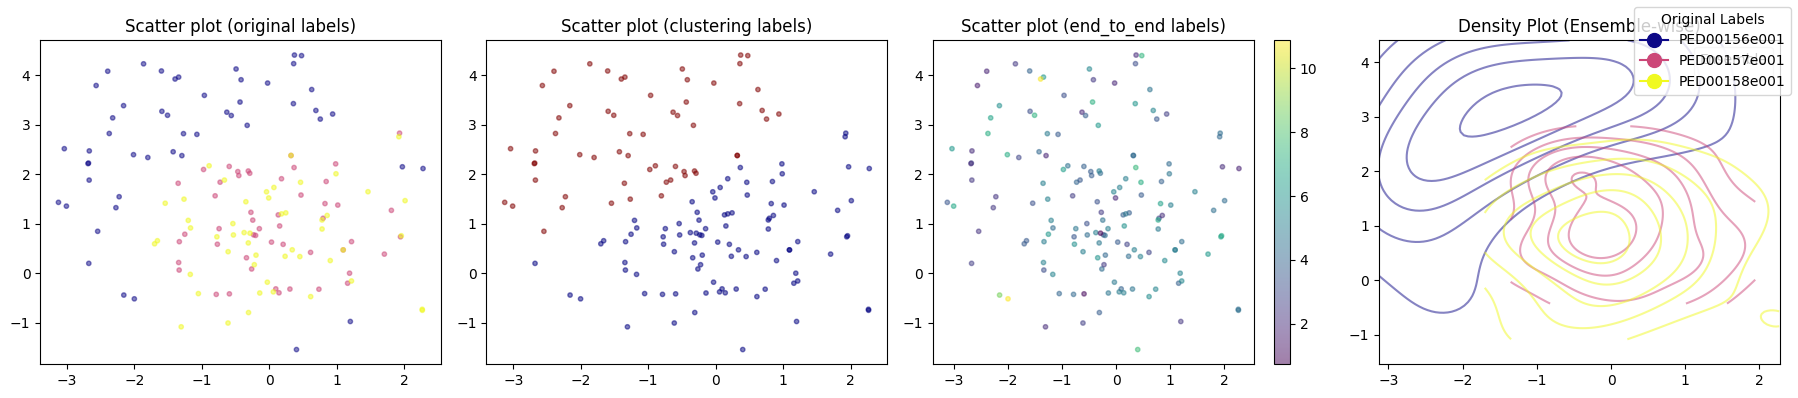

In [9]:
vis.dimensionality_reduction_scatter(color_by="end_to_end", save=False, kde_by_ensemble=True)